In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('metoodataset3.xlsx')

In [ ]:
df.head()

,Age,Education,Ethnicity,Sexual orientation,Income,How masculine do you feel?,How important is it to you that others see you as masculine?,Where have you gotten your ideas about what it means to be a good man? (Father),Where have you gotten your ideas about what it means to be a good man? (Mother),Where have you gotten your ideas about what it means to be a good man? (Other family members),...,AMONG EMPLOYED WHO HAVE HEARD OF METOO: As a man would you say you think about your behavior at work differently in the wake of MeToo?,Do you typically feel as though you're expected to make the first move in romantic relationships?,How often do you try to be the one who pays when on a date?,When you want to be physically intimate with someone you: read their body language,When you want to be physically intimate with someone you: ask for verbal confirmation or consent,When you want to be physically intimate with someone you: Make a physical move to see how they react,When you want to be physically intimate with someone you:Every situation is different,When you want to be physically intimate with someone you:It isn?t always clear how to gauge someone?s interest,When you want to be physically intimate with someone you:other,Have you changed your behavior in romantic relationships in the wake of MeToo movement?
0,35 - 64,College graduate,Hispanic,Gay,"$0-$9,999",Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,...,NaN,Yes,Sometimes,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,No
1,65 and up,Some college,White,Straight,"$50,000-$74,999",Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,...,NaN,No,Rarely,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),No
2,35 - 64,College graduate,White,Straight,"$50,000-$74,999",Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,...,No,Yes,Sometimes,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,No
3,65 and up,Some college,White,No answer,"$50,000-$74,999",Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,...,NaN,Yes,Always,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,No answer
4,35 - 64,College graduate,White,Straight,"$50,000-$74,999",Very masculine,Very important,Not selected,Not selected,Other family members,...,Yes,No,Always,Not selected,Ask for a verbal confirmation of consent,Not selected,Not selected,Not selected,Not selected,No


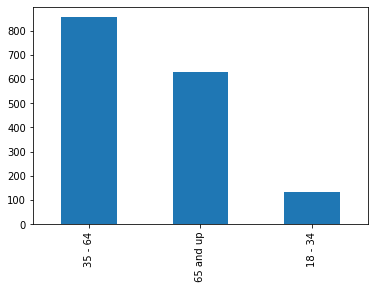

In [ ]:
df['Age'].value_counts().plot.bar()

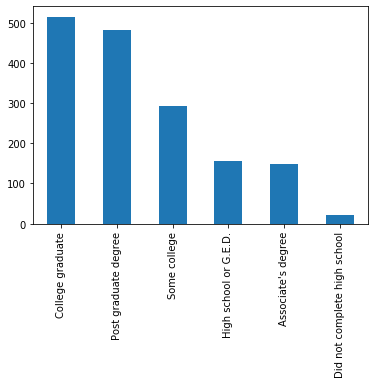

In [ ]:
df['Education'].value_counts().plot.bar()

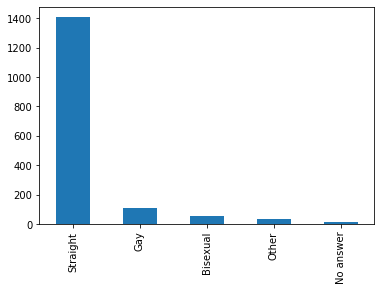

In [ ]:
df['Sexual orientation'].value_counts().plot.bar()

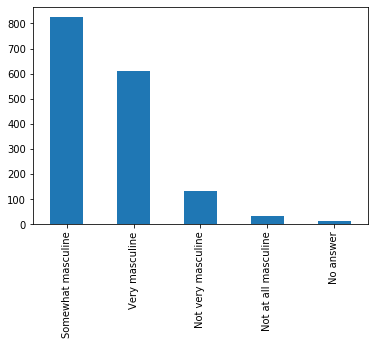

In [ ]:
df['How masculine do you feel?'].value_counts().plot.bar()

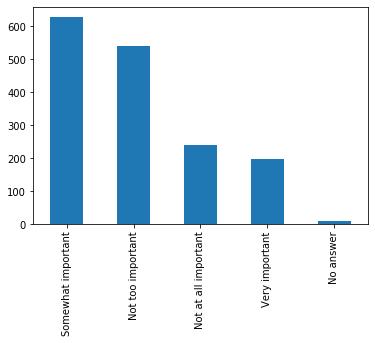

In [ ]:
df['How important is it to you that others see you as masculine?'].value_counts().plot.bar()

In [ ]:
df_feel = df[['Age', 'Sexual orientation','How masculine do you feel?']]

In [ ]:
df_feel.head()

,Age,Sexual orientation,How masculine do you feel?
0,35 - 64,Gay,Somewhat masculine
1,65 and up,Straight,Somewhat masculine
2,35 - 64,Straight,Very masculine
3,65 and up,No answer,Very masculine
4,35 - 64,Straight,Very masculine


In [ ]:
idade = {'65 and up': 3,
          '35 - 64': 2,
          '18 - 34': 1}

df_feel['Age'] = df_feel['Age'].map(idade)
df_feel

C:\Users\vivia\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Age,Sexual orientation,How masculine do you feel?
0,2,Gay,Somewhat masculine
1,3,Straight,Somewhat masculine
2,2,Straight,Very masculine
3,3,No answer,Very masculine
4,2,Straight,Very masculine
...,...,...,...
1610,1,Straight,Not very masculine
1611,2,Straight,Very masculine
1612,2,Straight,Somewhat masculine
1613,1,Straight,Somewhat masculine


In [ ]:
import numpy as np

# Criando um dicionario para converter rótulos de classe de strings para inteiros
class_mapping = {label: idx for idx, label in enumerate(np.unique(df_feel['How masculine do you feel?']))}
class_mapping

{'No answer': 0,
 'Not at all masculine': 1,
 'Not very masculine': 2,
 'Somewhat masculine': 3,
 'Very masculine': 4}

In [ ]:
df_feel

,Age,Sexual orientation,How masculine do you feel?
0,2,Gay,Somewhat masculine
1,3,Straight,Somewhat masculine
2,2,Straight,Very masculine
3,3,No answer,Very masculine
4,2,Straight,Very masculine
...,...,...,...
1610,1,Straight,Not very masculine
1611,2,Straight,Very masculine
1612,2,Straight,Somewhat masculine
1613,1,Straight,Somewhat masculine


In [ ]:
df_feel['How masculine do you feel?'] = df_feel['How masculine do you feel?'].map(class_mapping)
df_feel

C:\Users\vivia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Sexual orientation,How masculine do you feel?
0,2,Gay,3
1,3,Straight,3
2,2,Straight,4
3,3,No answer,4
4,2,Straight,4
...,...,...,...
1610,1,Straight,2
1611,2,Straight,4
1612,2,Straight,3
1613,1,Straight,3


In [ ]:
df_sex = pd.get_dummies(df_feel["Sexual orientation"],prefix='Sexual orientation',drop_first=False)

In [ ]:
df_done = pd.concat([df_feel[["Age", "How masculine do you feel?"]] , df_sex],  axis=1)

In [ ]:
df_done.describe()

,Age,How masculine do you feel?,Sexual orientation_Bisexual,Sexual orientation_Gay,Sexual orientation_No answer,Sexual orientation_Other,Sexual orientation_Straight
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000
mean,2.305882,3.232198,0.032198,0.068731,0.008050,0.019195,0.871827
std,0.614213,0.750847,0.176581,0.253074,0.089385,0.137253,0.334386
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


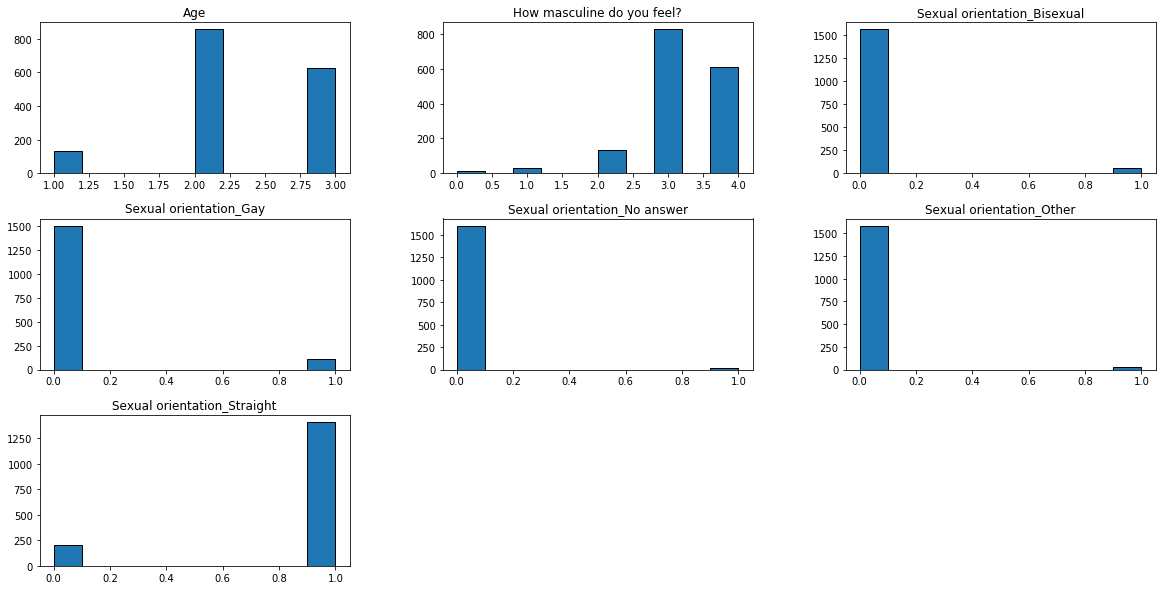

In [ ]:
df_done.hist(edgecolor='black', figsize=(20, 10), grid=False);

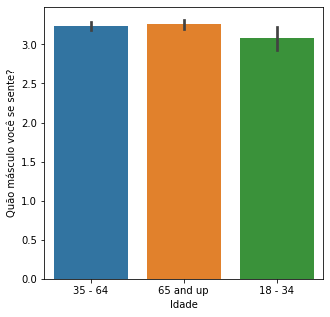

In [ ]:
plt.figure(figsize=(5, 5))

sns.barplot(
    x=df['Age'], 
    y=df_done['How masculine do you feel?']
)

plt.xlabel('Idade')
plt.ylabel('Quão másculo você se sente?')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df['How masculine do you feel?'].unique()

array(['Somewhat masculine', 'Very masculine', 'Not at all masculine',
       'Not very masculine', 'No answer'], dtype=object)

In [ ]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['How masculine do you feel?']))}
class_mapping

{'No answer': 0,
 'Not at all masculine': 1,
 'Not very masculine': 2,
 'Somewhat masculine': 3,
 'Very masculine': 4}

In [ ]:
feel = {'No answer': 5,
    'Not at all masculine': 4,
        'Not very masculine': 3,
          'Somewhat masculine': 2,
          'Very masculine': 1}

df['How masculine do you feel?'] = df['How masculine do you feel?'].map(feel)

In [ ]:
df

,Age,Education,Ethnicity,Sexual orientation,Income,How masculine do you feel?,How important is it to you that others see you as masculine?,Where have you gotten your ideas about what it means to be a good man? (Father),Where have you gotten your ideas about what it means to be a good man? (Mother),Where have you gotten your ideas about what it means to be a good man? (Other family members),...,AMONG EMPLOYED WHO HAVE HEARD OF METOO: As a man would you say you think about your behavior at work differently in the wake of MeToo?,Do you typically feel as though you're expected to make the first move in romantic relationships?,How often do you try to be the one who pays when on a date?,When you want to be physically intimate with someone you: read their body language,When you want to be physically intimate with someone you: ask for verbal confirmation or consent,When you want to be physically intimate with someone you: Make a physical move to see how they react,When you want to be physically intimate with someone you:Every situation is different,When you want to be physically intimate with someone you:It isn?t always clear how to gauge someone?s interest,When you want to be physically intimate with someone you:other,Have you changed your behavior in romantic relationships in the wake of MeToo movement?
0,35 - 64,College graduate,Hispanic,Gay,"$0-$9,999",2,Somewhat important,Not selected,Not selected,Not selected,...,NaN,Yes,Sometimes,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they react,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,No
1,65 and up,Some college,White,Straight,"$50,000-$74,999",2,Somewhat important,Father or father figure(s),Not selected,Not selected,...,NaN,No,Rarely,Not selected,Not selected,Not selected,Not selected,Not selected,Other (please specify),No
2,35 - 64,College graduate,White,Straight,"$50,000-$74,999",1,Not too important,Father or father figure(s),Not selected,Not selected,...,No,Yes,Sometimes,Not selected,Not selected,Not selected,Every situation is different,Not selected,Not selected,No
3,65 and up,Some college,White,No answer,"$50,000-$74,999",1,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,...,NaN,Yes,Always,Not selected,Not selected,Not selected,Not selected,Not selected,Not selected,No answer
4,35 - 64,College graduate,White,Straight,"$50,000-$74,999",1,Very important,Not selected,Not selected,Other family members,...,Yes,No,Always,Not selected,Ask for a verbal confirmation of consent,Not selected,Not selected,Not selected,Not selected,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,18 - 34,Some college,White,Straight,"$10,000-$24,999",3,Not at all important,Father or father figure(s),Mother or mother figure(s),Other family members,...,Yes,No,Never,Not selected,Not selected,Not selected,Not selected,It isn?t always clear how to gauge someone?s i...,Not selected,No
1611,35 - 64,Did not complete high school,Hispanic,Straight,"$50,000-$74,999",1,Very important,Father or father figure(s),Not selected,Other family members,...,Yes,Yes,Always,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Not selected,Every situation is different,It isn?t always clear how to gauge someone?s i...,Not selected,No
1612,35 - 64,Associate's degree,White,Straight,"$50,000-$74,999",2,Somewhat important,Not selected,Mother or mother figure(s),Not selected,...,Yes,Yes,Always,Not selected,Not selected,Make a physical move to see how they react,Not selected,Not selected,Not selected,No
1613,18 - 34,High school or G.E.D.,White,Straight,"$10,000-$24,999",2,Somewhat important,Not selected,Mother or mother figure(s),Not selected,...,Yes,Yes,Always,Read their physical body language to see if th...,Ask for a verbal confirmation of consent,Make a physical move to see how they re

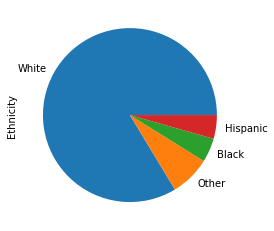

In [ ]:
df['Ethnicity'].value_counts().plot.pie()

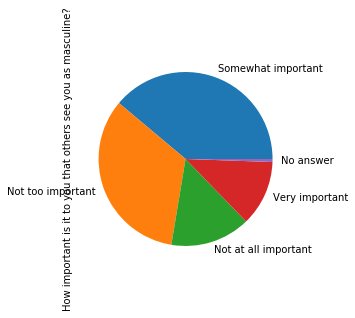

In [ ]:
df['How important is it to you that others see you as masculine?'].value_counts().plot.pie()

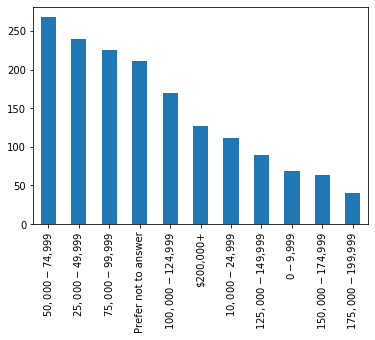

In [ ]:
df['Income'].value_counts().plot.bar()

In [ ]:
df['AMONG EMPLOYED: If you have seen sexual harassment at work, and didnt do anything: why?'].value_counts()

You didn?t think it was your place           19
You weren?t sure it was sexual harassment    13
You didn?t want to get involved              10
Other (please specify)                        5
You weren?t sure who to contact               1
No answer                                     1
Name: AMONG EMPLOYED: If you have seen sexual harassment at work, and didnt do anything: why?, dtype: int64

In [ ]:
df['Where have you gotten your ideas about what it means to be a good man? (Pop culture)'].value_counts()

Not selected    1312
Pop culture      303
Name: Where have you gotten your ideas about what it means to be a good man? (Pop culture), dtype: int64

In [ ]:
df2 = pd.read_excel('metoo.xlsx')

In [ ]:
df2

,Confrontou o abusador,Entrou em contato com o RH,Contactou o gerente do abusador,Ofereceu apoio a vitima,Não fez nada,Nunca presenciou abuso sexual,Outro,Voce mudou por causa do MeToo?
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True
2,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
731,False,False,False,False,False,True,False,False
732,False,False,False,False,False,True,False,True
733,False,False,False,False,False,True,False,True
734,False,False,False,False,False,True,False,True


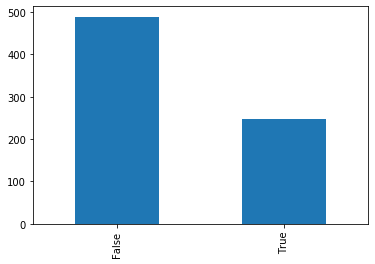

In [ ]:
df2['Voce mudou por causa do MeToo?'].value_counts().plot.bar()

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
apriori(df2, min_support=0.01,use_colnames=True, verbose=1)

Processing 20 combinations | Sampling itemset size 4


,support,itemsets
0,0.052989,(Confrontou o abusador)
1,0.080163,(Entrou em contato com o RH)
2,0.054348,(Contactou o gerente do abusador)
3,0.104620,(Ofereceu apoio a vitima)
4,0.052989,(Não fez nada)
5,0.716033,(Nunca presenciou abuso sexual)
6,0.044837,(Outro)
7,0.335598,(Voce mudou por causa do MeToo?)
8,0.016304,"(Confrontou o abusador, Entrou em contato com ..."
9,0.019022,"(Confrontou o abusador, Contactou o gerente do..."


In [ ]:
df_seen = pd.read_excel('metooseen.xlsx')

In [ ]:
df_seen

,Confrontou o abusador,Entrou em contato com o RH,Contactou o gerente do abusador,Ofereceu apoio a vitima,Não fez nada,Outro
0,False,False,False,False,False,True
1,True,False,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,True,True,False,True,False,False
...,...,...,...,...,...,...
204,True,False,False,True,False,False
205,False,False,False,False,True,False
206,False,True,False,False,False,False
207,True,True,True,True,False,False


In [ ]:
apriori(df_seen, min_support=0.01,use_colnames=True, verbose=1)

Processing 4 combinations | Sampling itemset size 4


,support,itemsets
0,0.052989,(Confrontou o abusador)
1,0.080163,(Entrou em contato com o RH)
2,0.054348,(Contactou o gerente do abusador)
3,0.104620,(Ofereceu apoio a vitima)
4,0.052989,(Não fez nada)
5,0.044837,(Outro)
6,0.016304,"(Confrontou o abusador, Entrou em contato com ..."
7,0.019022,"(Confrontou o abusador, Contactou o gerente do..."
8,0.029891,"(Confrontou o abusador, Ofereceu apoio a vitima)"
9,0.027174,"(Entrou em contato com o RH, Contactou o geren..."


In [ ]:
df2.describe()

,Confrontou o abusador,Entrou em contato com o RH,Contactou o gerente do abusador,Ofereceu apoio a vitima,Não fez nada,Nunca presenciou abuso sexual,Outro,Voce mudou por causa do MeToo?
count,736,736,736,736,736,736,736,736
unique,2,2,2,2,2,2,2,2
top,False,False,False,False,False,True,False,False
freq,697,677,696,659,697,527,703,489


In [ ]:
df_seen.describe()

,Confrontou o abusador,Entrou em contato com o RH,Contactou o gerente do abusador,Ofereceu apoio a vitima,Não fez nada,Outro
count,209,209,209,209,209,209
unique,2,2,2,2,2,2
top,False,False,False,False,False,False
freq,170,150,169,132,170,176


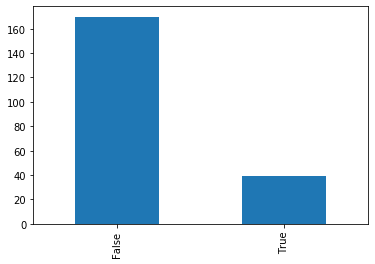

In [ ]:
df_seen['Não fez nada'].value_counts().plot.bar()

In [ ]:
df_seen['Não fez nada'].value_counts()

False    170
True      39
Name: Não fez nada, dtype: int64

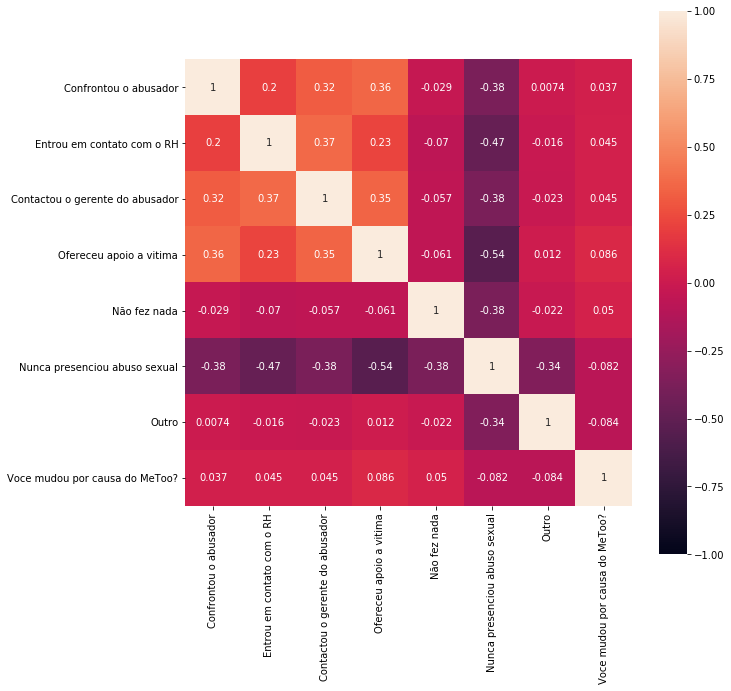

In [ ]:
# Matriz de correlação
corr_mat = df2.corr()

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr_mat, 
    annot=True, 
    square=True, 
    vmax=1, 
    vmin=-1
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5
)

clf.fit(
    df2.drop(['Voce mudou por causa do MeToo?'], axis=1),
    df2['Voce mudou por causa do MeToo?']
)

clf.feature_importances_

array([0.21650433, 0.10203832, 0.09872848, 0.20470267, 0.07293301,
       0.08664004, 0.21845313])

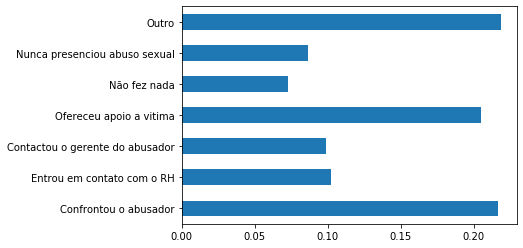

In [ ]:
feat_importances = pd.Series(
    clf.feature_importances_, 
    index=df2.drop(['Voce mudou por causa do MeToo?'], axis=1).columns
)
feat_importances.plot(kind='barh');

In [ ]:
X = df2.drop(['Voce mudou por causa do MeToo?'], axis=1)
y = df2['Voce mudou por causa do MeToo?']

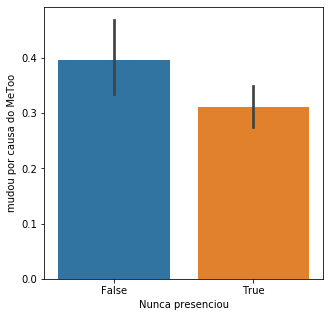

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Tamanho da pétala por tipo
plt.figure(figsize=(5, 5))

sns.barplot(
    x=df2['Nunca presenciou abuso sexual'], 
    y=df2['Voce mudou por causa do MeToo?']
)

plt.xlabel('Nunca presenciou')
plt.ylabel('mudou por causa do MeToo')
plt.show()